In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
from classes.fbref import FBRef

## Here we will compare the top teams in LaLiga:
In LaLiga we will grab Real Madrid, Barcelona and Atlético Madrid.

In [3]:
data = FBRef()

## We will group each team in a Panda dataset:

In [4]:
laliga = data.get_hdf5('laliga_j2.h5', 'laliga_j2')

#### Extract Teams: 

In [5]:
madrid = laliga['Jornada 2']['Real Madrid']['Away']['Away']
barcelona = laliga['Jornada 2']['Barcelona']['Home']['Home']
atletico = laliga['Jornada 2']['Atletico']['Away']['Away']

### Basic Stuff:
team_names = ['Real Madrid', 'Barcelona', 'Atletico Madrid']
color_codes = ['#11875d', '#014182', '#9a0200']

#### Let's make the passes metric of the weekend: 

In [6]:
### Passes
rows_passes = [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%'), ('Unnamed: 22_level_0', 'xA'), ('Unnamed: 27_level_0', 'PrgP'), ('Player ID', '')]

#### List of positions
cm_list = ['CM', 'LM', 'RM', 'DM', 'AM']

In [7]:
### Save each team with it's pair
madrid_passes = data.structure_passing(rows_passes, cm_list, madrid)
barcelona_passes = data.structure_passing(rows_passes, cm_list, barcelona)
atletico_passes = data.structure_passing(rows_passes, cm_list, atletico)

### Recap Data:

In [8]:
## Data
data_passes = [madrid_passes, barcelona_passes, atletico_passes]
laliga_passes = data.league_panda(data_passes, team_names, color_codes)

### Scatter the data:

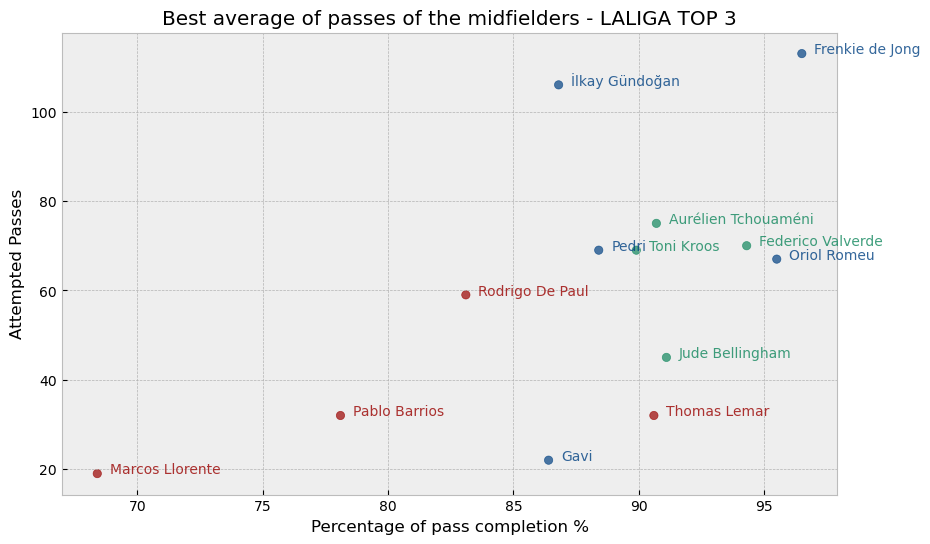

In [9]:
## Style plot
plt.style.use('bmh')

# PLOT 
plt.figure(figsize=(10, 6))

data.scatter_match(laliga_passes[('Total', 'Cmp%')].values, laliga_passes[('Total', 'Att')].values, laliga_passes[('Unnamed: 0_level_0', 'Player')].values, laliga_passes['ColorCode'].values, distance=0.5, size=10)

#### Competition
league = 'LALIGA TOP 3'

#### styles:
plt.title(f'Best average of passes of the midfielders - {league}')
plt.xlabel('Percentage of pass completion %')
plt.ylabel('Attempted Passes')
plt.grid(True)